# Projeto: Segmentação de clientes de um banco para defenição de estratégia de marketing

##Neste projeto vamos usar o algoitmo de machine learning k-means para segmentar clientes de uma empresa de cartão de crédito


<img src="Clientes.jpg" width=500 height=500>


- **O que significa segmentação de clientes para instituições financeiras**: os bancos possuem uma quantidade enorme de clientes, correntistas dos mais variados perfis sócio-econômico e comportamental. Dessa forma, buscam criar grupos negociais de acordo com particularidades comuns e, assim, mesmo que o atendimento seja massificado, a idéia é tratar de forma diferenciada cada um desses grupos. 
- *A base de dados usada será a Credit Card Dastasest for Clustering, disponível no site*: https://www.kaggle.com/arjunbhasin2013/ccdata
- Foi resgistrado o comportamento de 9000 clientes que possuem cartão de crédito durante 6 meses. 





## Explorando os Dados

Vamos começar importando as bibliotecas do python que serão usadas, e analisando o Dataset

In [1]:
# Importando as bibliotecas que serão usadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Carregando o Dataset 'credito'

creditcard_df = pd.read_csv('credito.csv')

In [ ]:
# Conferindo a quantidade de colunas e linhas do DataFrame

creditcard_df.shape

(8950, 18)

In [ ]:
# Vamos visualizar as primeiras cinco linhas do DataFrame
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Checando o nome e Dtype de cada coluna (Feature)
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Descrição estatística das colunas numéricas (valor mínimo e máximo, desvio padrão e média)
# Serão usados principalmente para detecção de outliers que possam desbalancear os algoritmos de machine learning

creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Checando se há valores nulos nas colunas ou se existem linhas repetidas

print(f'No Dataframe há {creditcard_df.duplicated().sum()} linhas repetidas')
print(f'No Dataframe há {creditcard_df.isnull().sum().sum()} valores nulos')

No Dataframe há 0 linhas repetidas
No Dataframe há 314 valores nulos


In [ ]:
# Vamos checar em quais colunas estão os valores nulos
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Checando qual a média dos valores da coluna 'MINIMUM_PAYMENTS'
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [ ]:
# Preenchemos os valores nulos da coluna 'MINIMUM_PAYMENTS' com a média da coluna
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Vamos fazer o mesmo com o único valor ausente da coluna 'CREDIT_LIMIT'
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [ ]:
# Substituímos o valor ausente pela média dos valores da coluna
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
# Checando se ainda há algum valor Nan
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Antes de plotarmos alguns gráficos, vamos retirar a coluna 'CUST_ID' que é apenas o ID único de cada cliente
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
# Conferindo se a coluna 'CUST_ID' foi retirada
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Visualização dos dados

## Plotaremos alguns gráficos para tirarmos alguns insights do nosso Dataframe

In [ ]:
# Quais são as colunas do nosso dataframe
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
# Quantidade de colunas do dataframe
len(creditcard_df.columns)

17

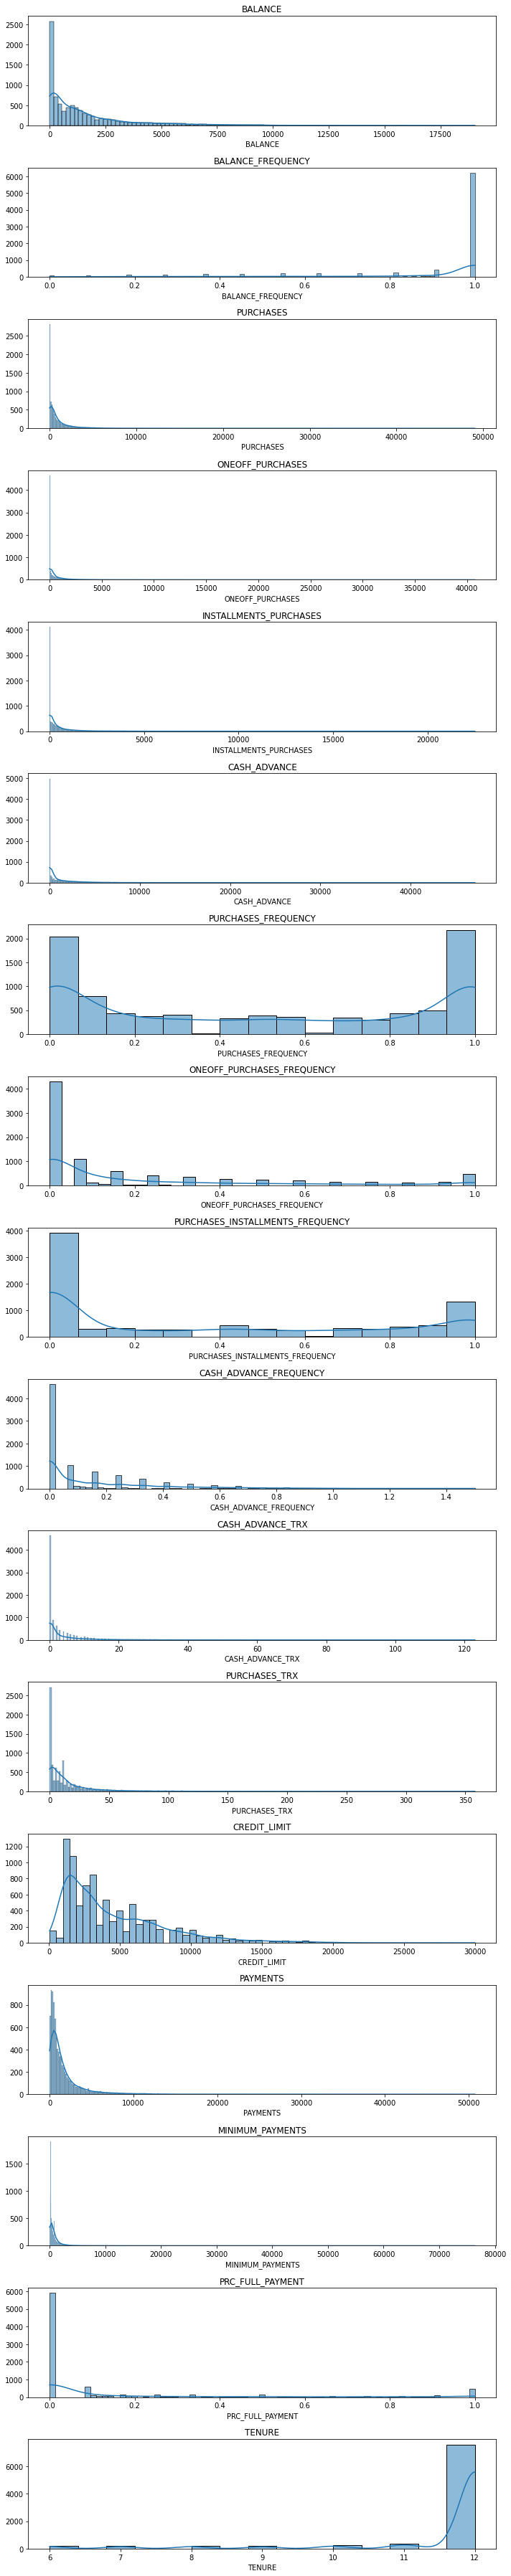

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.histplot(x=creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
  plt.ylabel('')
plt.tight_layout();

In [ ]:
# Analisando o grau de correlação entre as variáveis
correlations = creditcard_df.corr()

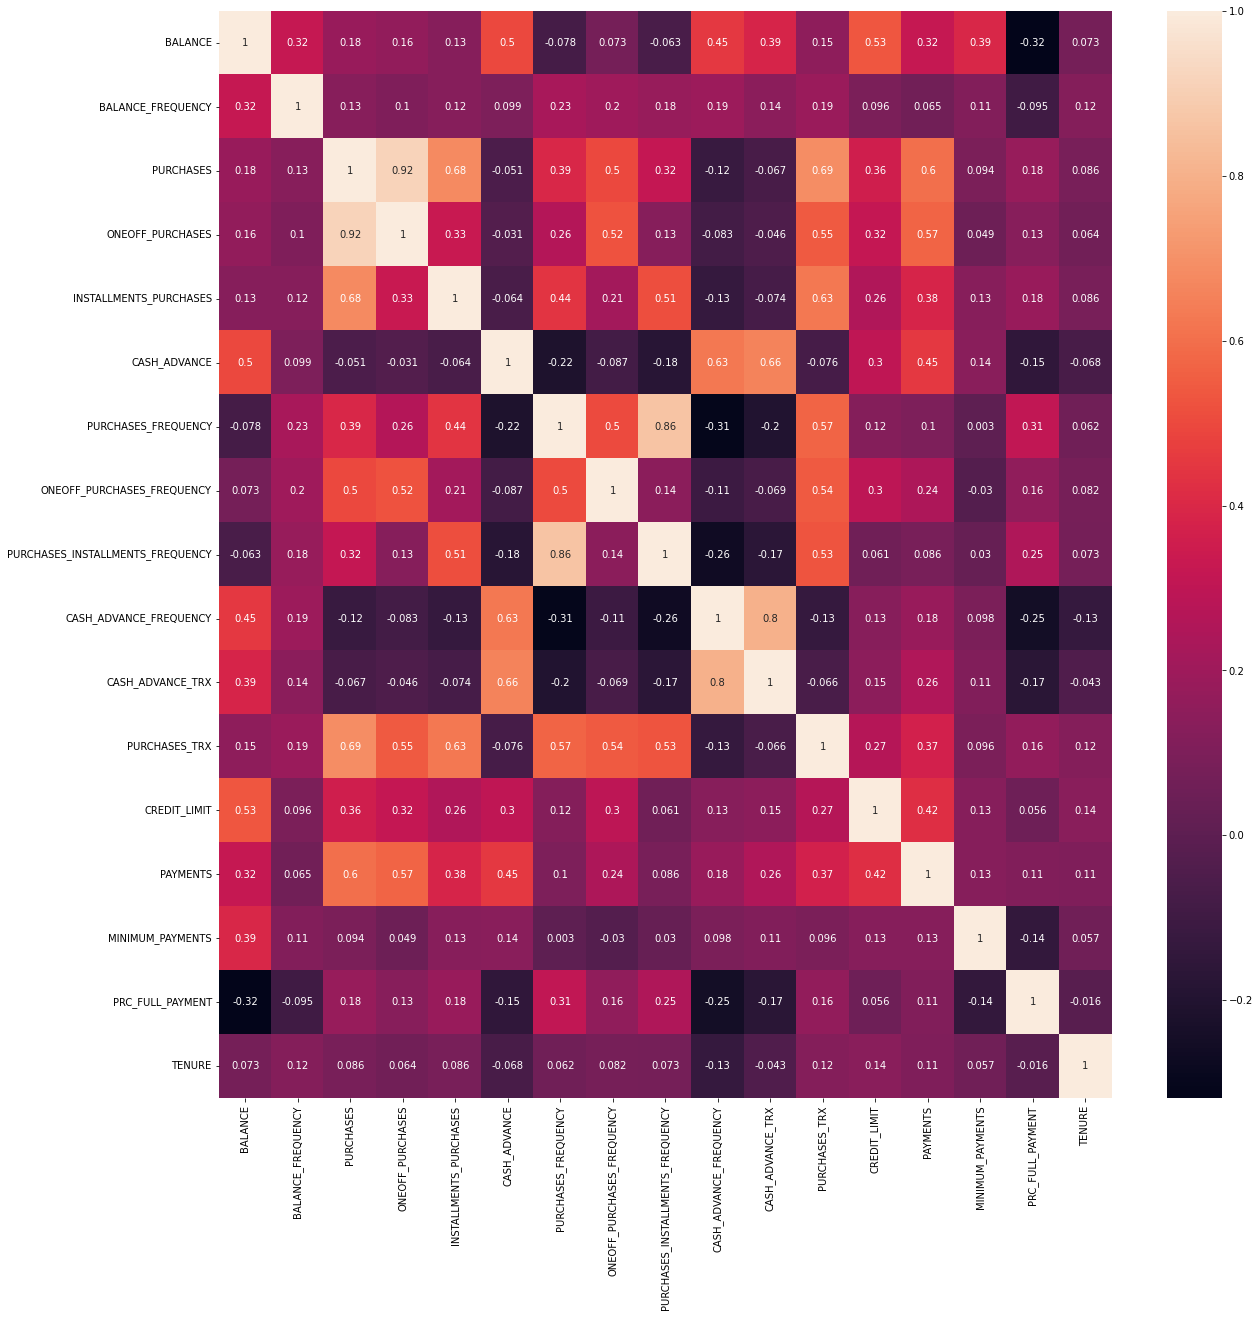

In [ ]:
# Para facilitar a visualização dos graus de correlação, criaremos um mapa de calor 
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Definição do número de agrupamentos usando o Elbow Method

- Nosso objetivo é dividir os clientes em grupos com características de gastos semelhantes. Esses grupos são chamados, em machine learning, de clusters. 

In [ ]:
# Antes de aplicar algoritmos de ML, precisamos fazer com que os valores fiquem na mesma escala 
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [ ]:
scaler = StandardScaler()
creditcard_df_nlz = scaler.fit_transform(creditcard_df)

In [ ]:
type(creditcard_df_nlz), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [ ]:
min(creditcard_df_nlz[0]), max(creditcard_df_nlz[0])

(-0.9604333444542572, 0.36067954425377496)

In [ ]:
creditcard_df_nlz

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [ ]:
print(wcss_1)

[152149.99999999983, 127784.83311042094, 111986.74707959307, 99074.09271117713, 91503.39081843363, 84851.13240432573, 79780.7366584765, 74802.31923454425, 71072.20957917986, 66474.96633557268, 64202.20210962422, 61369.73603544875, 59662.49513206772, 57534.522138514716, 55843.3202911542, 54268.45653030365, 53412.2231056003, 51897.64735452803, 50936.197033773606]


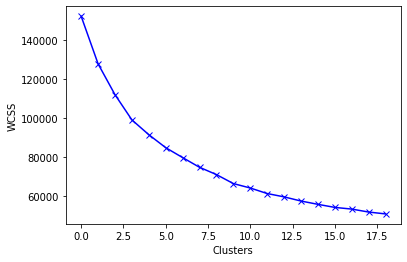

In [ ]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels, len(labels)

(array([2, 7, 4, ..., 5, 5, 5], dtype=int32), 8950)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1185,  352, 2754, 2017, 1124,  624,   23,  871]))

In [ ]:
kmeans.cluster_centers_

array([[-7.01256868e-01, -2.13718863e+00, -3.10069269e-01,
        -2.34784376e-01, -3.01699709e-01, -3.22765882e-01,
        -5.53110181e-01, -4.41424205e-01, -4.38830575e-01,
        -5.21893308e-01, -3.76564009e-01, -4.18536192e-01,
        -1.76209490e-01, -2.02134599e-01, -2.57091539e-01,
         2.87615164e-01,  2.01638346e-01],
       [ 1.04528458e+00,  4.64553769e-01,  2.52465622e+00,
         1.83118973e+00,  2.60533420e+00, -1.42073634e-01,
         1.16390302e+00,  1.56540149e+00,  1.27109320e+00,
        -2.81518970e-01, -1.43449937e-01,  3.13451523e+00,
         1.30672885e+00,  1.47495197e+00,  6.30776405e-01,
         2.62390941e-01,  3.37328257e-01],
       [ 1.33875826e-02,  4.04182313e-01, -3.57143502e-01,
        -2.41749994e-01, -4.00212954e-01, -9.54852577e-02,
        -8.53021324e-01, -3.94539934e-01, -7.54596525e-01,
         1.02544743e-01, -2.86404317e-02, -4.81605319e-01,
        -3.02773752e-01, -2.50761943e-01, -6.24441180e-03,
        -4.55722120e-01,  2.7

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701257,-2.137189,-0.310069,-0.234784,-0.301700,-0.322766,-0.553110,-0.441424,-0.438831,-0.521893,-0.376564,-0.418536,-0.176209,-0.202135,-0.257092,0.287615,0.201638
1,1.045285,0.464554,2.524656,1.831190,2.605334,-0.142074,1.163903,1.565401,1.271093,-0.281519,-0.143450,3.134515,1.306729,1.474952,0.630776,0.262391,0.337328
2,0.013388,0.404182,-0.357144,-0.241750,-0.400213,-0.095485,-0.853021,-0.394540,-0.754597,0.102545,-0.028640,-0.481605,-0.302774,-0.250762,-0.006244,-0.455722,0.273583
3,-0.359697,0.333849,-0.033699,-0.241779,0.364316,-0.361805,0.994089,-0.382531,1.205967,-0.472205,-0.359291,0.192306,-0.259874,-0.213967,-0.029870,0.310589,0.256310
4,-0.132209,0.400709,0.542548,0.671842,0.048372,-0.331360,0.981009,1.905497,0.174249,-0.413112,-0.330056,0.622308,0.435117,0.146256,-0.157881,0.443281,0.268855
5,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
7,1.684825,0.392297,-0.217128,-0.154878,-0.228926,2.015901,-0.472108,-0.207199,-0.412839,1.919179,1.924697,-0.265881,1.029783,0.823182,0.508667,-0.389790,0.069847


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.867851,0.370990,340.737061,202.743395,138.244341,302.015981,0.268361,0.070772,0.190035,0.030708,0.679054,4.306588,3853.327233,1147.983995,265.065556,0.237837,11.787162
1,3740.146457,0.987319,6397.171761,3631.837273,2767.039034,680.936065,0.957481,0.669447,0.869602,0.078809,2.269886,92.622159,9248.863636,6002.985286,2334.204345,0.230460,11.968750
2,1592.339951,0.973018,240.162237,191.181895,49.160036,778.634067,0.147992,0.084759,0.064541,0.155664,3.053377,2.738925,3392.834665,1007.212599,849.654204,0.020424,11.883442
3,815.796821,0.956357,931.205825,191.133829,740.514433,220.149126,0.889326,0.088341,0.843719,0.040651,0.796929,19.489846,3548.920358,1113.729278,794.596263,0.244557,11.860327
4,1289.292410,0.972195,2162.367854,1707.557996,454.809858,283.994140,0.884077,0.770904,0.433688,0.052476,0.996438,30.178094,6077.584392,2156.540981,496.272230,0.283367,11.877115
5,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372
6,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
7,5071.295693,0.970202,539.308335,335.372009,204.053054,5206.309490,0.300871,0.140646,0.200364,0.519191,16.383467,8.101033,8241.222211,4116.175055,2049.633613,0.039708,11.610792


In [ ]:
labels, len(labels)

(array([2, 7, 4, ..., 5, 5, 5], dtype=int32), 8950)

In [ ]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


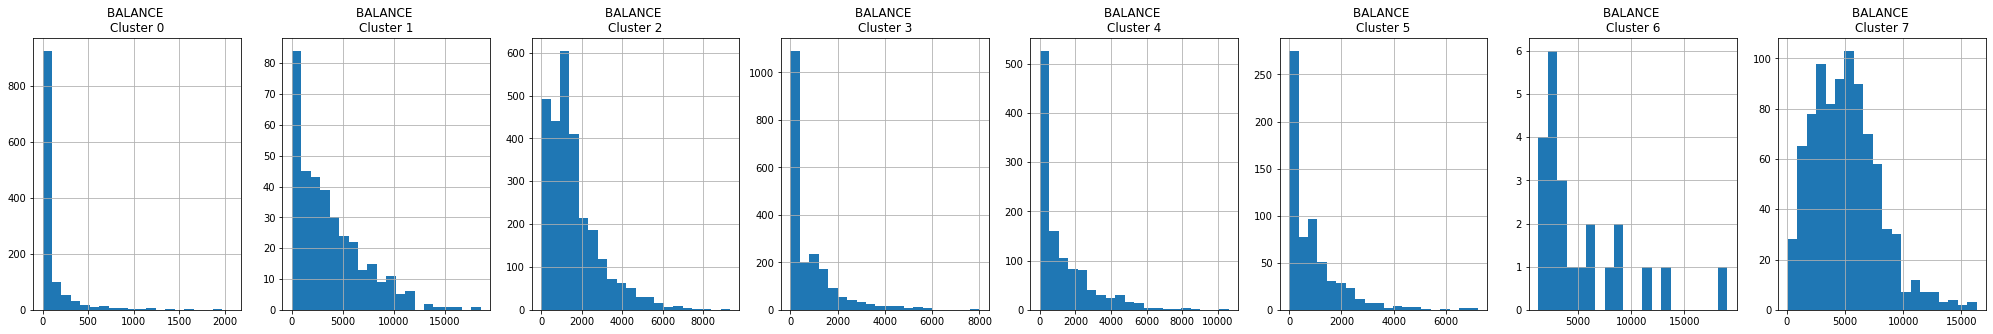

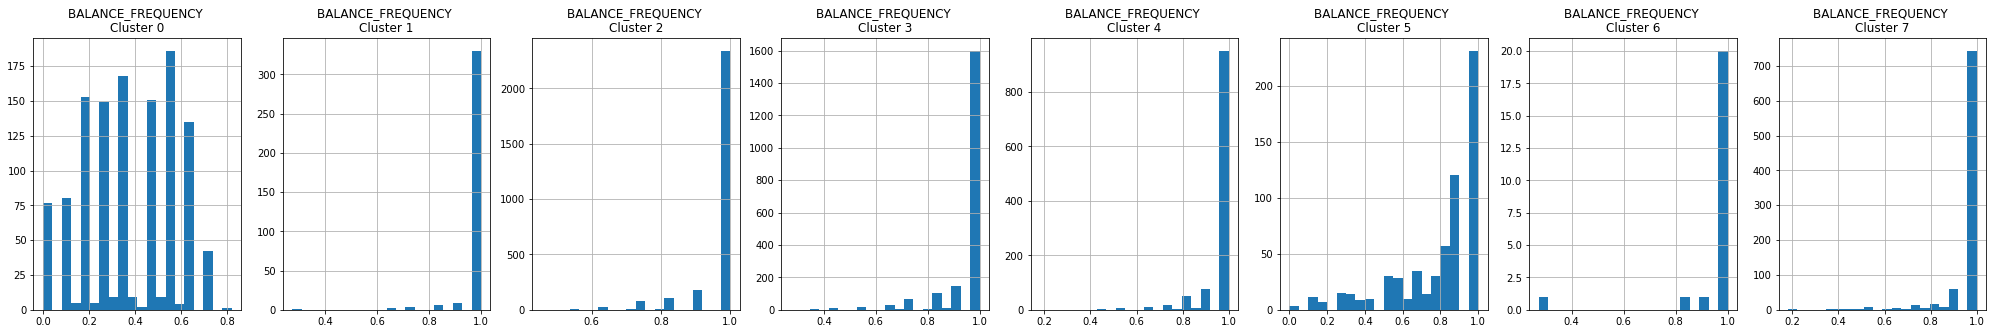

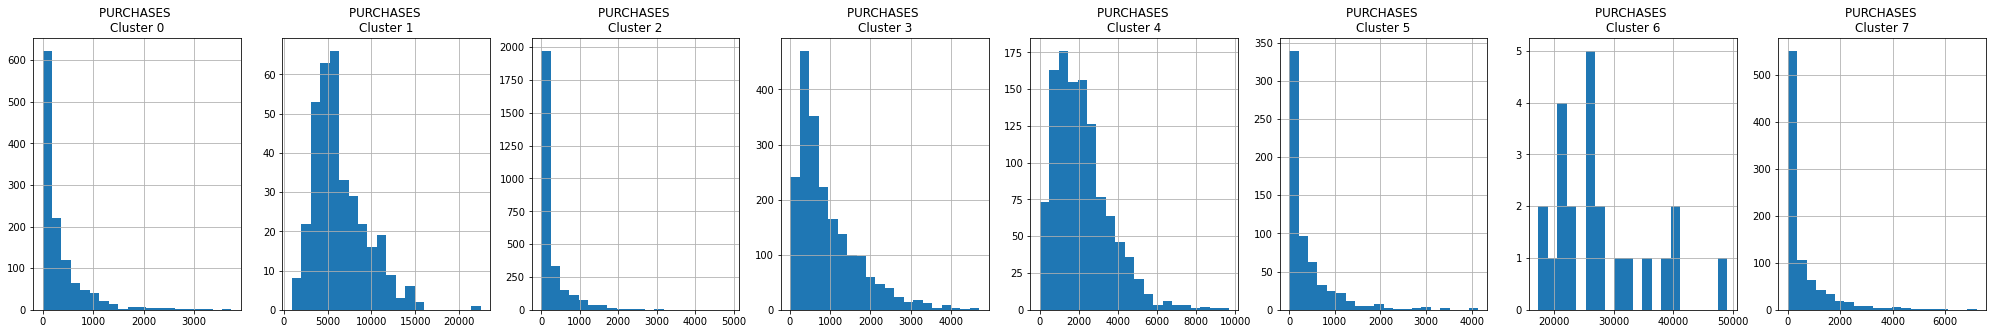

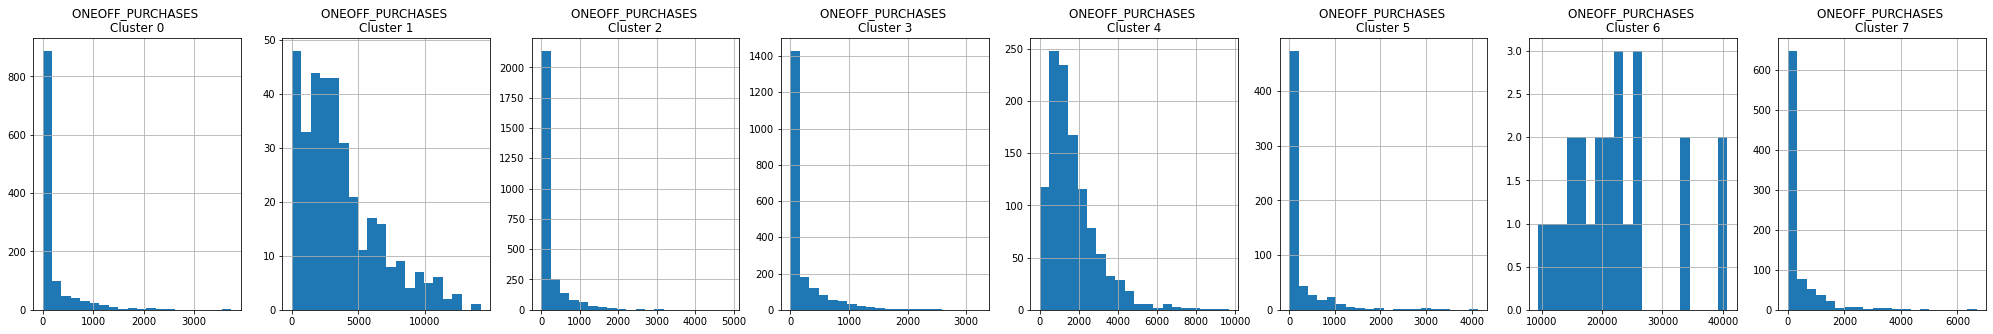

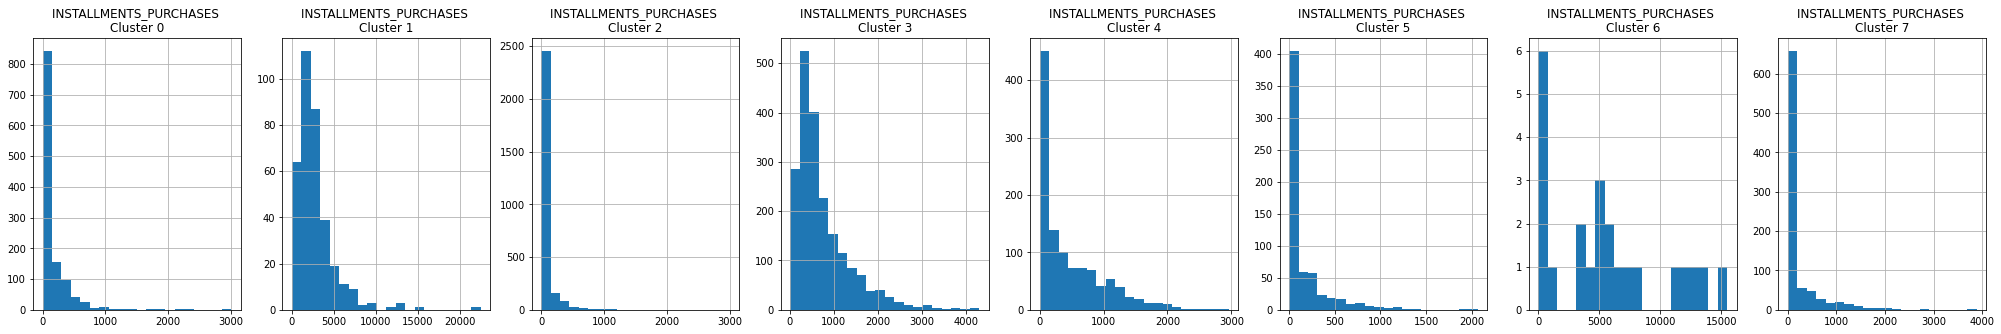

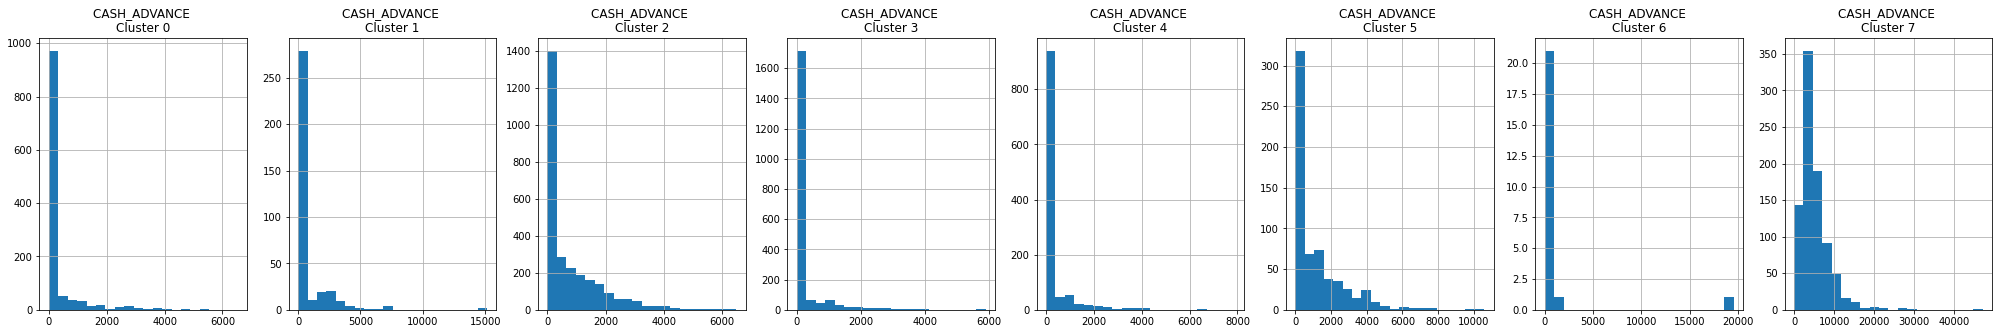

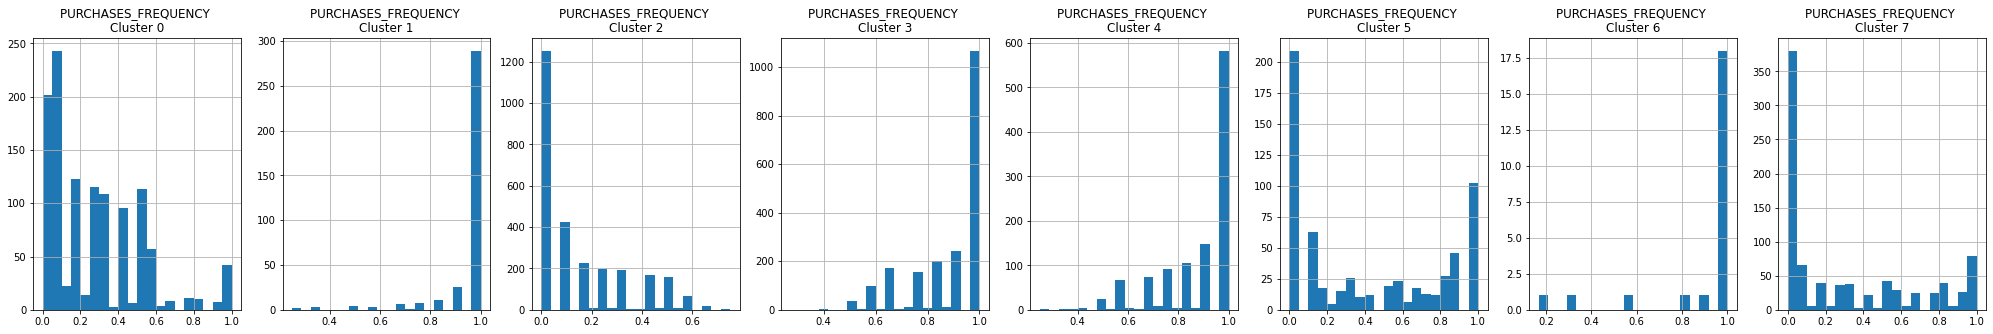

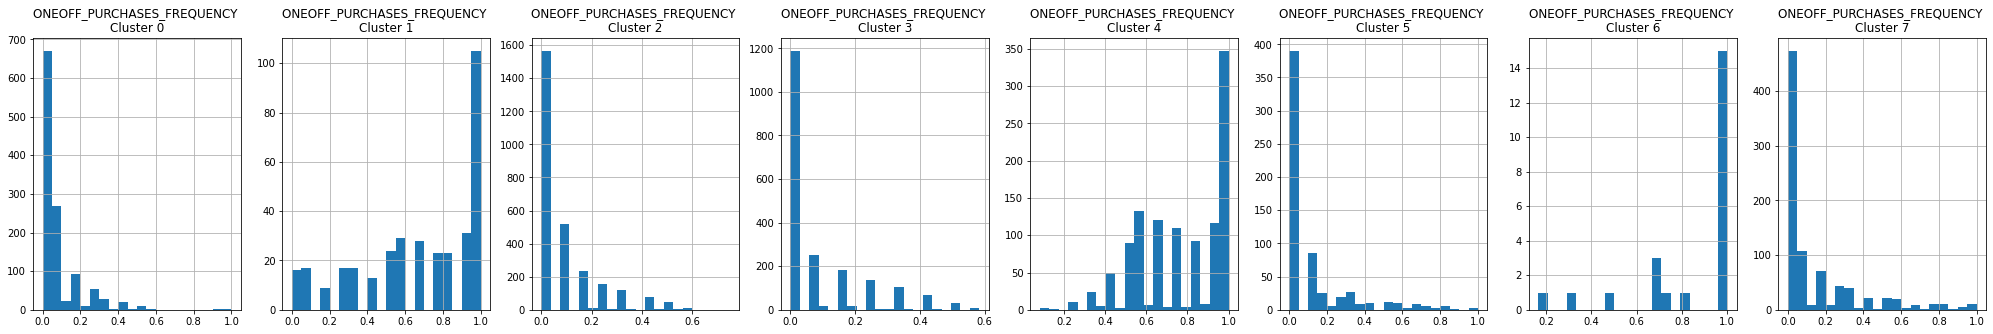

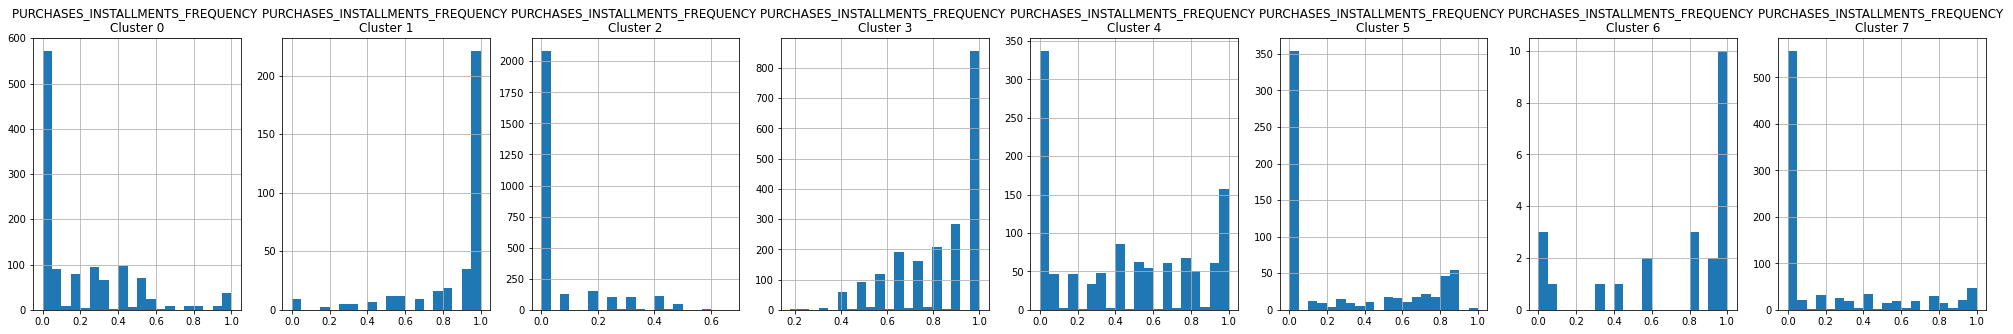

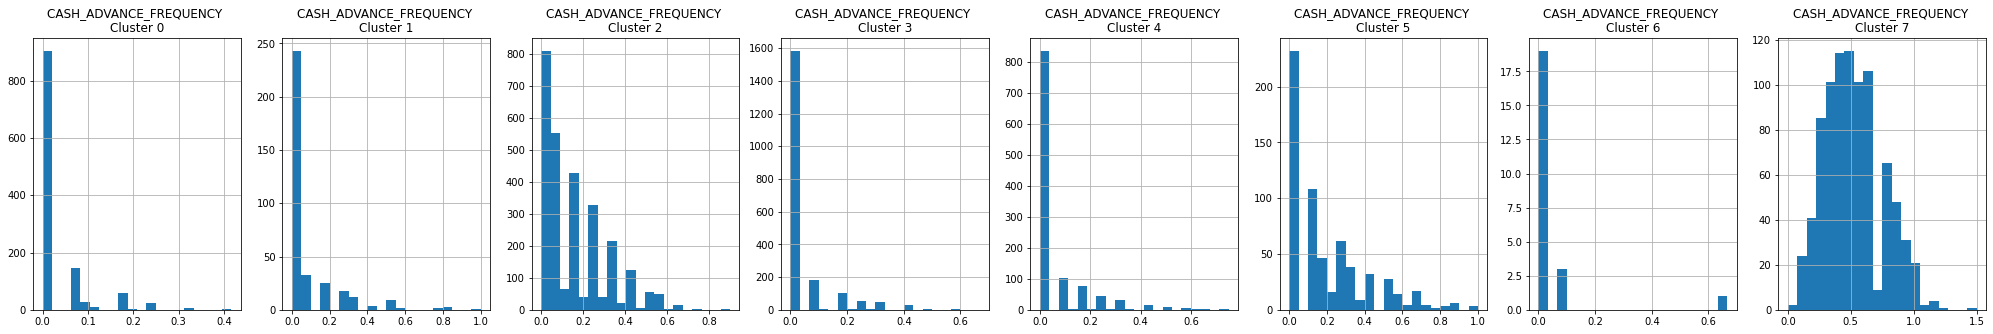

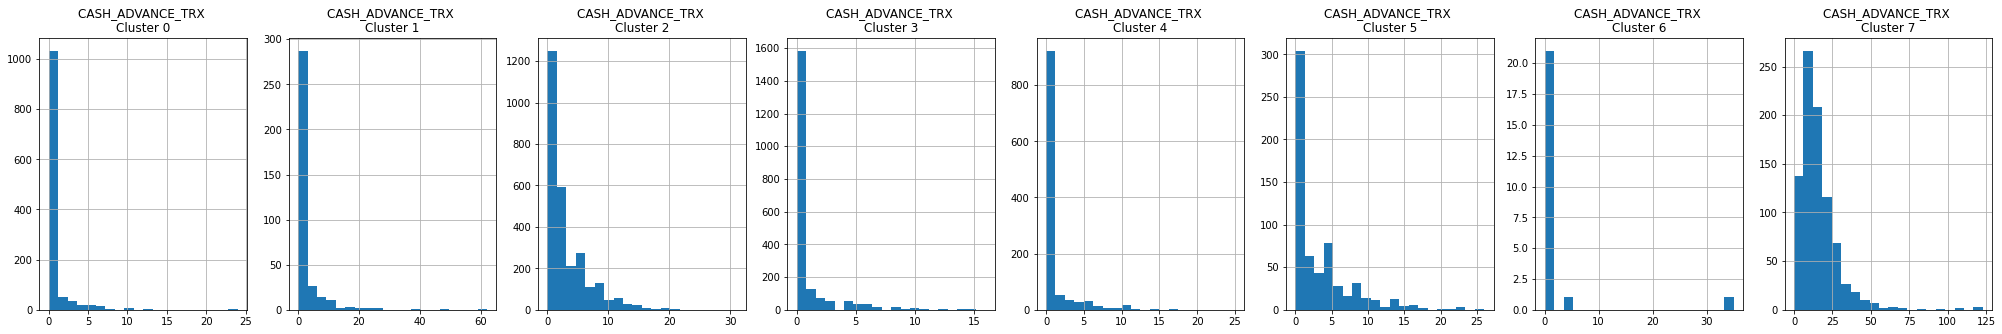

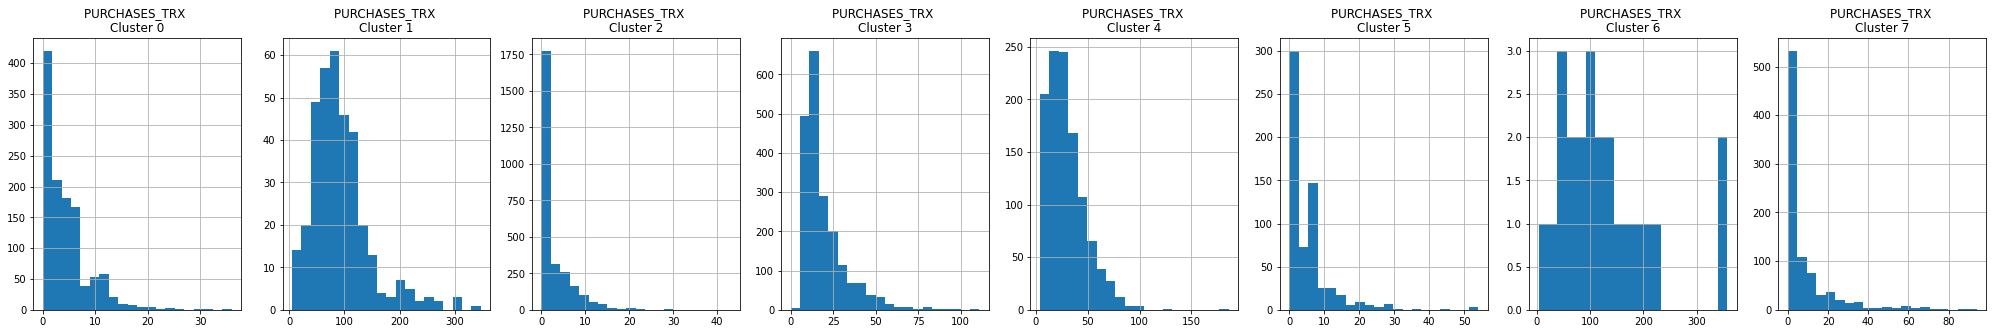

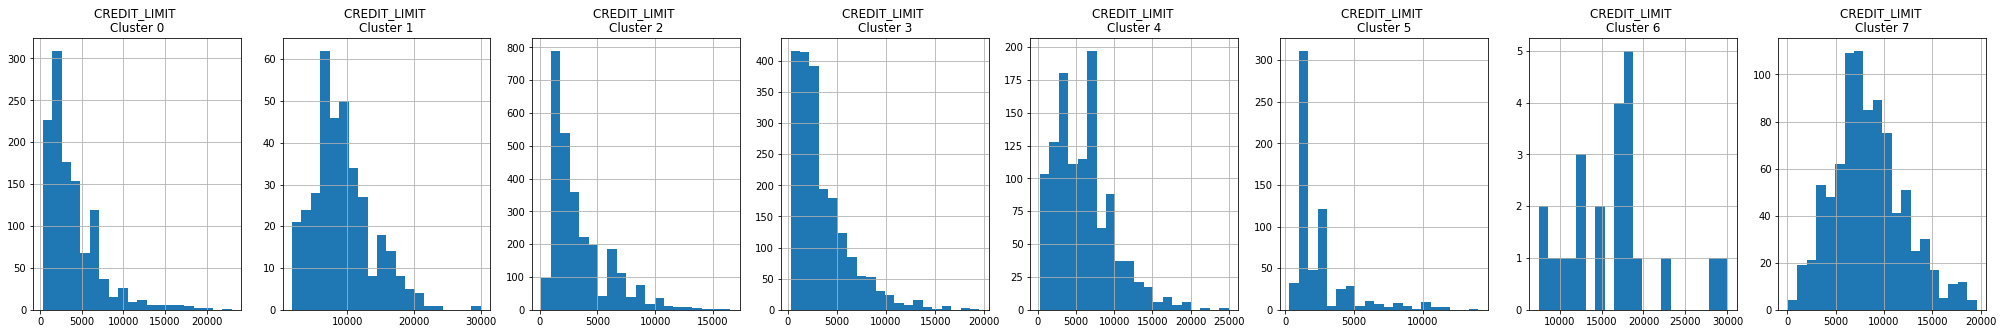

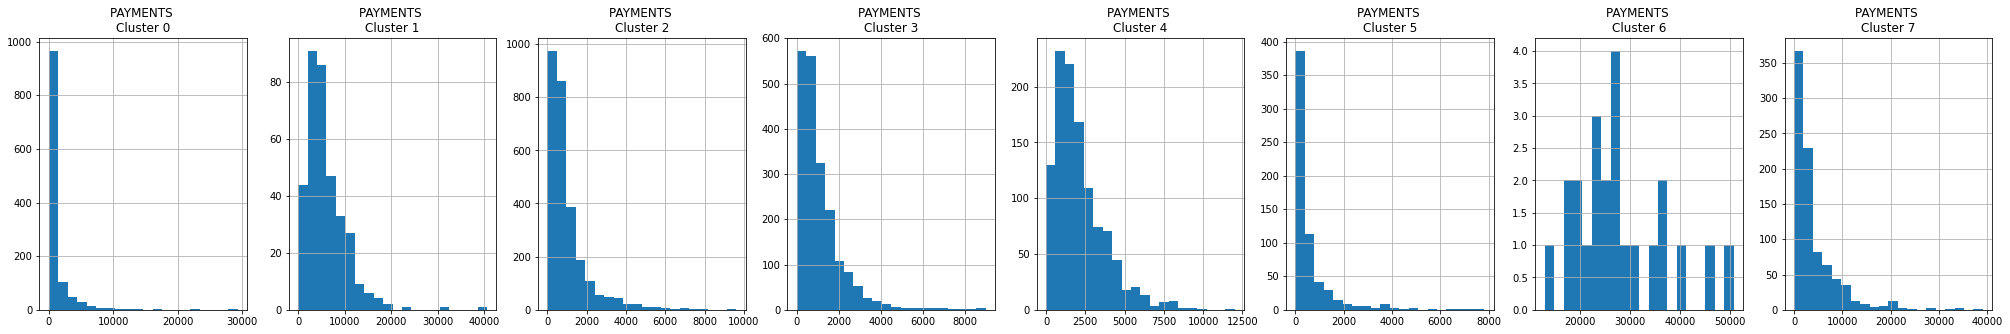

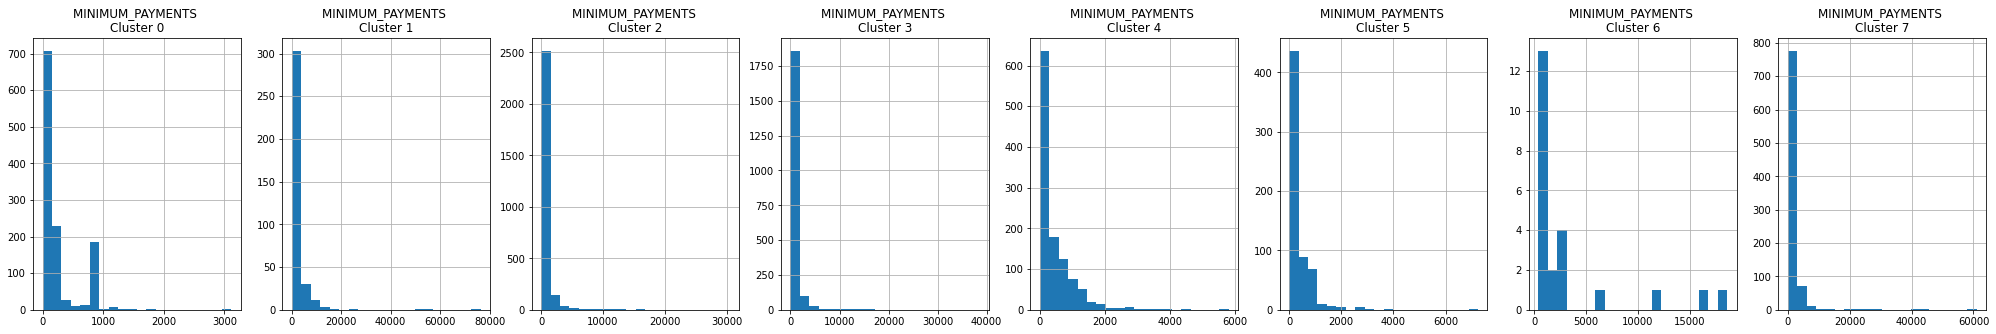

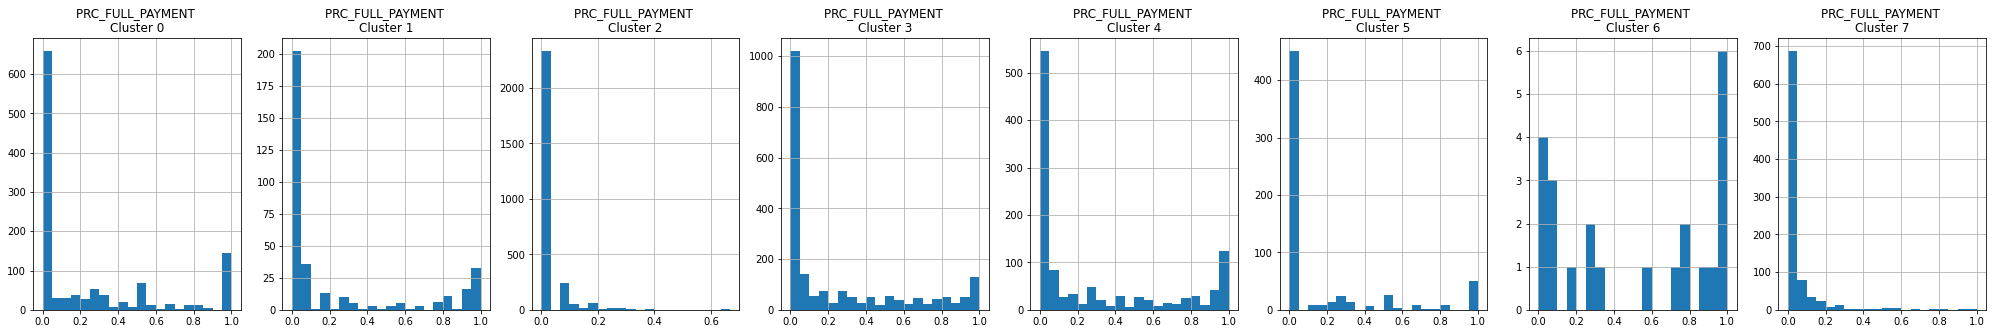

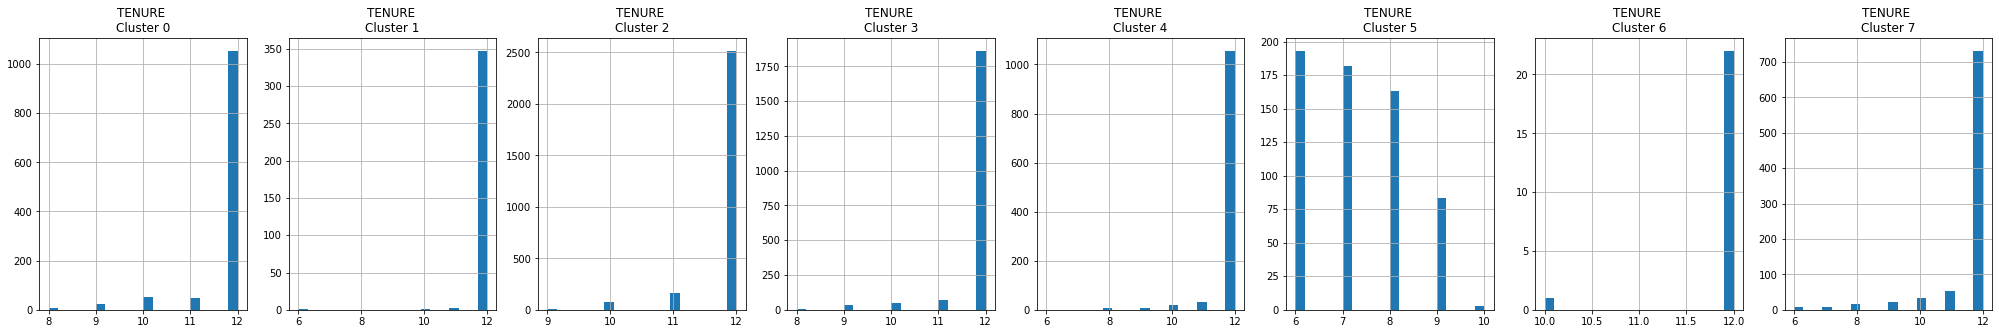

In [ ]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [ ]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1085,48.157955,0.363636,648.24,286.00,362.24,0.00000,0.333333,0.250000,0.250000,0.000000,0,6,2000.0,753.720188,58.719455,0.363636,12,0
1182,543.350448,0.545455,0.00,0.00,0.00,3493.29196,0.000000,0.000000,0.000000,0.166667,8,0,6000.0,7158.478105,612.399286,0.285714,12,0
6810,0.704307,0.181818,963.90,607.28,356.62,0.00000,0.500000,0.083333,0.500000,0.000000,0,10,3000.0,1502.662849,14.571644,0.000000,12,0
6811,71.558308,0.181818,650.00,650.00,0.00,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,2500.0,3804.775151,86.539433,0.000000,12,0
6813,3.760290,0.181818,45.00,0.00,45.00,0.00000,0.083333,0.000000,0.083333,0.000000,0,2,3000.0,1895.798955,68.967179,0.000000,12,0


In [ ]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
285,4246.430225,1.000000,0.00,0.00,0.0,9270.408108,0.000000,0.000000,0.0,0.666667,16,0,7000.0,6010.525656,1793.262654,0.083333,12,7
4640,6313.362606,0.909091,0.00,0.00,0.0,9687.179224,0.000000,0.000000,0.0,0.636364,11,0,10000.0,6291.189848,1246.208875,0.090909,11,7
5646,2584.317807,1.000000,0.00,0.00,0.0,6036.492283,0.000000,0.000000,0.0,0.250000,7,0,3000.0,6024.595066,826.013735,0.181818,12,7
7333,2760.898890,0.900000,0.00,0.00,0.0,4278.969301,0.000000,0.000000,0.0,0.600000,11,0,7500.0,997.950103,750.602361,0.000000,10,7
2349,8356.277203,1.000000,983.24,983.24,0.0,2329.181013,0.166667,0.166667,0.0,0.333333,7,4,14000.0,3468.135960,2412.958258,0.000000,12,7


In [ ]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222036, -1.07644713],
       [-1.13829572,  2.50648681],
       [ 0.96968544, -0.38352313],
       ...,
       [-0.92620344, -1.81078571],
       [-2.33655197, -0.65796828],
       [-0.55642202, -0.40047622]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076447
1,-1.138296,2.506487
2,0.969685,-0.383523
3,-0.873628,0.043173
4,-1.599434,-0.688579


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076447,2
1,-1.138296,2.506487,7
2,0.969685,-0.383523,4
3,-0.873628,0.043173,2
4,-1.599434,-0.688579,2


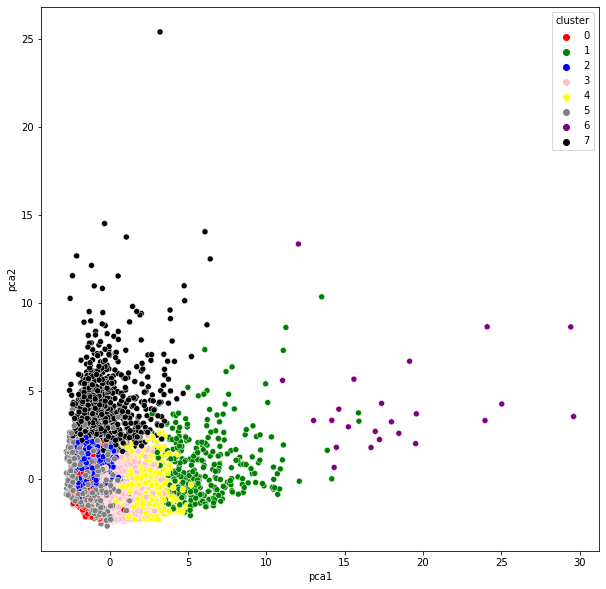

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [ ]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [ ]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [ ]:
# encoder
encoder = Model(input_df, encoded)

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 8s 26ms/step - loss: 0.1854
Epoch 2/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0769
Epoch 3/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0704
Epoch 4/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0496
Epoch 5/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0360
Epoch 6/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0499
Epoch 7/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0506
Epoch 8/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0473
Epoch 9/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0343
Epoch 10/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0319
Epoch 11/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0668
Epoch 12/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0517
Epoch 13/50
2

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 4ms/step


In [ ]:
compact.shape

(8950, 10)

In [ ]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [ ]:
compact[0]

array([1.302895  , 0.        , 0.38571268, 0.36040014, 0.4499796 ,
       0.21645476, 0.32646483, 0.5581844 , 0.        , 0.        ],
      dtype=float32)

In [ ]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

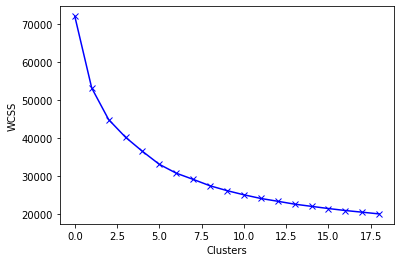

In [ ]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

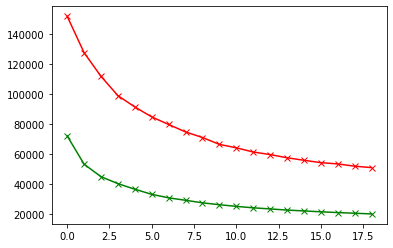

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 2, 2, ..., 0, 0, 0], dtype=int32), (8950,))

In [ ]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.358041,-0.104408
1,-0.276107,1.254752
2,-0.622817,-0.384673
3,-1.331633,-0.289734
4,-1.423541,-0.024860


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.358041,-0.104408,2
1,-0.276107,1.254752,2
2,-0.622817,-0.384673,2
3,-1.331633,-0.289734,2
4,-1.423541,-0.024860,2


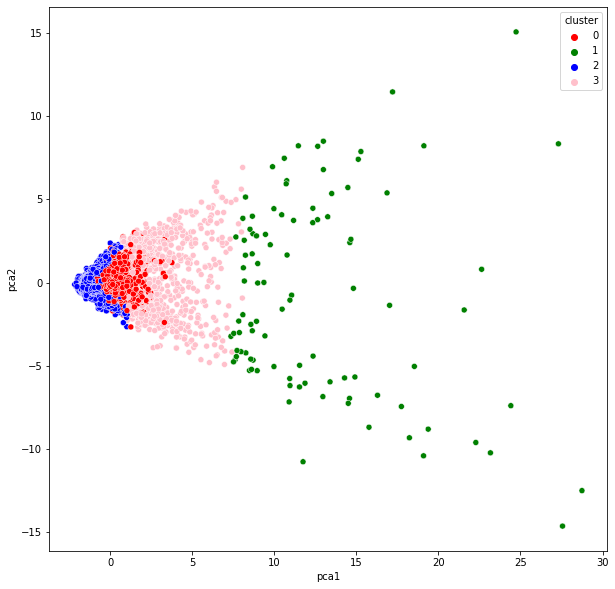

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [ ]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,0
6918,51.469651,0.727273,1169.00,0.00,1169.00,0.000000,1.000000,0.000000,1.0,0.000000,0,24,1900.0,915.665640,111.493268,0.5,12,0
2297,14.683440,0.363636,67.44,67.44,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,1,4000.0,82.000743,57.564463,0.0,12,0
6915,350.819852,0.363636,0.00,0.00,0.00,1056.460580,0.000000,0.000000,0.0,0.083333,3,0,1200.0,119.701887,340.789604,0.0,12,0
6911,311.987575,0.363636,684.24,0.00,684.24,0.000000,1.000000,0.000000,1.0,0.000000,0,37,1000.0,2154.534733,508.095621,0.0,12,0


In [ ]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5649,2091.627351,1.000000,4361.04,2325.83,2035.21,4224.133411,1.0,0.666667,1.0,0.833333,27,109,2500.0,7608.515679,915.803727,0.083333,12,3
3641,7064.550470,1.000000,0.00,0.00,0.00,11582.499110,0.0,0.000000,0.0,0.750000,38,0,11500.0,7964.175992,1607.124085,0.000000,12,3
1514,588.795215,0.636364,4116.00,0.00,4116.00,0.000000,0.5,0.000000,0.5,0.000000,0,12,21500.0,8130.112361,224.763498,1.000000,12,3
1491,4393.185874,1.000000,0.00,0.00,0.00,10725.500740,0.0,0.000000,0.0,0.500000,21,0,8000.0,5943.975673,1631.426308,0.090909,12,3
2406,397.003171,1.000000,3042.08,1419.07,1623.01,0.000000,1.0,1.000000,1.0,0.000000,0,98,8500.0,2764.893686,246.737259,0.333333,12,3


In [ ]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
